In [6]:
import geopandas as gpd
from shapely import ops
from shapely import geometry as geom
from sjoin import sjoin
%matplotlib inline

ImportError: No module named 'geopandas'

In [7]:
### GET BOROUGH GEOJSON FILE FROM:
### https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson
bb = gpd.read_file('boroughs.geojson')

NameError: name 'gpd' is not defined

In [8]:
bb

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623853e+09,330385.03697,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,3.049947e+09,861038.47930,(POLYGON ((-73.83668274106708 40.5949466970158...
2,3,Brooklyn,1.959432e+09,726568.94634,(POLYGON ((-73.8670614947212 40.58208797679338...
3,1,Manhattan,6.364422e+08,358532.95642,(POLYGON ((-74.01092841268033 40.6844914725429...
4,2,Bronx,1.186804e+09,464517.89055,(POLYGON ((-73.89680883223775 40.7958084451597...


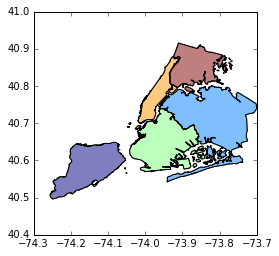

In [9]:
bb.plot()

In [10]:
sum(bb.area)

0.083702405481052428

In [11]:
bb.geometry.convex_hull

0    POLYGON ((-74.24712436215984 40.49611539517034...
1    POLYGON ((-73.94073681665428 40.54182008715522...
2    POLYGON ((-73.98336058039274 40.56952999448672...
3    POLYGON ((-74.02305574749596 40.68291694544512...
4    POLYGON ((-73.87830680057651 40.78535662050845...
dtype: object

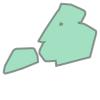

In [12]:
ops.unary_union(bb.geometry.convex_hull)

In [27]:
bb.set_geometry(bb.geometry.buffer(0.01))

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623853e+09,330385.03697,POLYGON ((-74.26535140539572 40.50554738553281...
1,4,Queens,3.049947e+09,861038.47930,POLYGON ((-73.94967501980393 40.72823461085725...
2,3,Brooklyn,1.959432e+09,726568.94634,"POLYGON ((-74.05174366578505 40.6222888884483,..."
3,1,Manhattan,6.364422e+08,358532.95642,POLYGON ((-74.03610112667097 40.68221493200161...
4,2,Bronx,1.186804e+09,464517.89055,POLYGON ((-73.94338267887477 40.83484327867296...


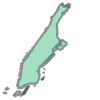

In [28]:
bb.geometry[3]

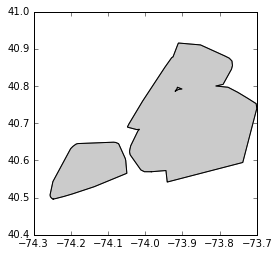

In [7]:
gpd.GeoSeries(avg).plot()

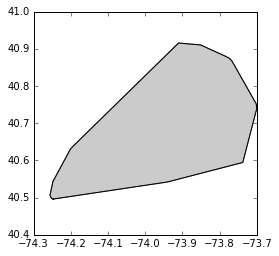

In [11]:
avg = avg.convex_hull
gpd.GeoSeries(avg).plot()

In [24]:
avg

NameError: name 'avg' is not defined

In [12]:
avg.area

0.13582928600400046

In [13]:
print avg.centroid

POINT (-73.94650690661533 40.68857526610002)


In [26]:
points = [geom.Point(-73.94650690661533, 40.68857526610002)]
gs = gpd.GeoSeries(points)
gd = gpd.GeoDataFrame(geometry=gs)

In [29]:
gd.crs = bb.crs

In [31]:
sjoin(gd, bb, how="left", op="within")

,geometry,index_right,BoroCode,BoroName,Shape_Area,Shape_Leng
0,POINT (-73.94650690661533 40.68857526610002),2,3,Brooklyn,1.959432e+09,726568.94634
